In [68]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0e2a6569-28be-420c-8002-cdbe661b6fce', # use your API key from 'https://coinmarketcap.com/api/'
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2024-05-11T16:15:19.686Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 9937}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11041, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [69]:
type(data)

dict

In [70]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [71]:
df =pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [72]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19696950.00000,19696950.00000,False,NaN,1,NaN,NaN,None,2024-05-11T16:13:00.000Z,61175.92809,18851729854.55557,-30.88290,0.15673,0.23237,-3.67307,-12.57941,-14.40183,27.13704,1204979196729.17041,53.24490,1284694489822.66992,None,2024-05-11T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 18:15:22.165378
1,1027,Ethereum,ETH,ethereum,8912,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120109116.67963,120109116.67963,True,NaN,2,NaN,NaN,None,2024-05-11T16:12:00.000Z,2922.81615,8986624006.13343,-21.25410,0.32528,0.08289,-6.35492,-16.78922,-26.26916,16.53077,351056866070.20831,15.51230,351056866070.21002,None,2024-05-11T16:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 18:15:22.165378
2,825,Tether USDt,USDT,tether,85136,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,110840001395.86620,113086550460.93433,True,NaN,3,NaN,NaN,None,2024-05-11T16:12:00.000Z,0.99964,36576101057.00594,-26.24570,-0.00396,-0.01573,-0.06760,-0.02320,-0.03146,-0.08252,110800282459.80722,4.89600,113046026485.74001,None,2024-05-11T16:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-11 18:15:22.165378
3,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586918.77458,147586918.77458,False,NaN,4,NaN,NaN,None,2024-05-11T16:12:00.000Z,591.34035,1419600066.24994,-7.80330,0.00603,0.78225,0.20953,-1.98768,9.15938,84.11535,87274100687.25061,3.85640,87274100687.25000,None,2024-05-11T16:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 18:15:22.165378
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,448424349.30980,575699089.95494,True,NaN,5,NaN,NaN,None,2024-05-11T16:12:00.000Z,145.91060,1673238081.49724,-33.20680,0.24344,-0.75681,0.24134,-16.19887,-2.68151,34.05770,65429867370.02402,2.89120,84000601570.30000,None,2024-05-11T16:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 18:15:22.165378
5,3408,USDC,USDC,usd-coin,19041,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33109821101.31175,33109821101.31175,False,NaN,6,NaN,NaN,None,2024-05-11T16:12:00.000Z,0.99999,4190287463.12914,-27.64460,-0.00393,-0.00705,0.00033,-0.00923,0.00948,-0.02169,33109599203.03663,1.46300,33109599203.04000,None,2024-05-11T16:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-11 18:15:22.165378
6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55359176420.00000,99987633657.00000,False,NaN,7,NaN,NaN,None,2024-05-11T16:13:00.000Z,0.50678,589317305.55946,-44.73340,0.21934,1.01210,-5.31507,-16.55618,-27.33995,-4.14150,28055101068.37587,1.23970,50678320890.34000,None,2024-05-11T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 18:15:22.165378
7,11419,Toncoin,TON,toncoin,316,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3473829155.41334,5106452474.68651,True,NaN,8,3414166606.00000,23303513013.63428,None,2024-05-11T16:12:00.000Z,6.82553,384833993.24739,-50.08680,0.62130,1.30164,19.90505,-6.32891,86.31677,223.42802,23710741821.46021,1.04770,34854269117.46000,None,

In [73]:
def api_runner():

    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0e2a6569-28be-420c-8002-cdbe661b6fce', # use your API key from 'https://coinmarketcap.com/api/'
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index = True)

    #Use this if you want to create a csv and append data to it
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\oem\Desktop\Crypto API Pull\API.csv'):
      #df.to_csv(r'C:\Users\oem\Desktop\Crypto API Pull\API.csv', header = 'column_names')
    #else:
      #df.to_csv(r'C:\Users\oem\Desktop\Crypto API Pull\API.csv', mode = 'a', header = False)

    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

In [74]:
import os
from time import time
from time import sleep

for i in range(333):
  api_runner()
  print('Api Runner completed successfully')
  sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2024-05-11T16:15:20.737Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 9937}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11041, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [ ]:
#df100 = pd.read_csv(r'C:\Users\oem\Desktop\Crypto API Pull\API.csv')


In [ ]:
#df100

In [75]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [76]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19696950.00000,19696950.00000,False,NaN,1,NaN,NaN,None,2024-05-11T16:13:00.000Z,61175.92809,18851729854.55557,-30.88290,0.15673,0.23237,-3.67307,-12.57941,-14.40183,27.13704,1204979196729.17041,53.24490,1284694489822.66992,None,2024-05-11T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 18:15:22.165378
1,1027,Ethereum,ETH,ethereum,8912,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120109116.67963,120109116.67963,True,NaN,2,NaN,NaN,None,2024-05-11T16:12:00.000Z,2922.81615,8986624006.13343,-21.25410,0.32528,0.08289,-6.35492,-16.78922,-26.26916,16.53077,351056866070.20831,15.51230,351056866070.21002,None,2024-05-11T16:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 18:15:22.165378
2,825,Tether USDt,USDT,tether,85136,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,110840001395.86620,113086550460.93433,True,NaN,3,NaN,NaN,None,2024-05-11T16:12:00.000Z,0.99964,36576101057.00594,-26.24570,-0.00396,-0.01573,-0.06760,-0.02320,-0.03146,-0.08252,110800282459.80722,4.89600,113046026485.74001,None,2024-05-11T16:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-11 18:15:22.165378
3,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586918.77458,147586918.77458,False,NaN,4,NaN,NaN,None,2024-05-11T16:12:00.000Z,591.34035,1419600066.24994,-7.80330,0.00603,0.78225,0.20953,-1.98768,9.15938,84.11535,87274100687.25061,3.85640,87274100687.25000,None,2024-05-11T16:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 18:15:22.165378
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,448424349.30980,575699089.95494,True,NaN,5,NaN,NaN,None,2024-05-11T16:12:00.000Z,145.91060,1673238081.49724,-33.20680,0.24344,-0.75681,0.24134,-16.19887,-2.68151,34.05770,65429867370.02402,2.89120,84000601570.30000,None,2024-05-11T16:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 18:15:22.165378
5,3408,USDC,USDC,usd-coin,19041,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33109821101.31175,33109821101.31175,False,NaN,6,NaN,NaN,None,2024-05-11T16:12:00.000Z,0.99999,4190287463.12914,-27.64460,-0.00393,-0.00705,0.00033,-0.00923,0.00948,-0.02169,33109599203.03663,1.46300,33109599203.04000,None,2024-05-11T16:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-11 18:15:22.165378
6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55359176420.00000,99987633657.00000,False,NaN,7,NaN,NaN,None,2024-05-11T16:13:00.000Z,0.50678,589317305.55946,-44.73340,0.21934,1.01210,-5.31507,-16.55618,-27.33995,-4.14150,28055101068.37587,1.23970,50678320890.34000,None,2024-05-11T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 18:15:22.165378
7,11419,Toncoin,TON,toncoin,316,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3473829155.41334,5106452474.68651,True,NaN,8,3414166606.00000,23303513013.63428,None,2024-05-11T16:12:00.000Z,6.82553,384833993.24739,-50.08680,0.62130,1.30164,19.90505,-6.32891,86.31677,223.42802,23710741821.46021,1.04770,34854269117.46000,None,

In [77]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [78]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.03268,0.15792,-3.67158,-12.55350,-14.29496,27.35483
Ethereum,0.14894,-0.05371,-6.34327,-16.69689,-26.22644,16.69566
Tether USDt,0.00585,-0.01196,-0.05848,-0.01968,-0.02863,-0.07962
BNB,-0.01542,0.67205,0.18975,-1.93849,9.02863,84.06724
Solana,0.10095,-1.06133,0.23229,-16.13044,-2.38958,34.39120
USDC,0.00603,-0.00236,0.00005,-0.00427,0.01190,-0.00998
XRP,0.13619,0.95741,-5.29932,-16.52628,-27.27949,-4.04101
Toncoin,0.71944,1.29789,19.86890,-6.24074,86.40377,224.12087
Dogecoin,0.05533,-0.16129,-10.76367,-25.43648,-14.28060,77.15591


In [79]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.03268
              quote.USD.percent_change_24h     0.15792
              quote.USD.percent_change_7d     -3.67158
              quote.USD.percent_change_30d   -12.55350
              quote.USD.percent_change_60d   -14.29496
              quote.USD.percent_change_90d    27.35483
Ethereum      quote.USD.percent_change_1h      0.14894
              quote.USD.percent_change_24h    -0.05371
              quote.USD.percent_change_7d     -6.34327
              quote.USD.percent_change_30d   -16.69689
              quote.USD.percent_change_60d   -26.22644
              quote.USD.percent_change_90d    16.69566
Tether USDt   quote.USD.percent_change_1h      0.00585
              quote.USD.percent_change_24h    -0.01196
              quote.USD.percent_change_7d     -0.05848
              quote.USD.percent_change_30d    -0.01968
              quote.USD.percent_change_60d    -0.02863
              quote.US

In [80]:
type(df4)

pandas.core.series.Series

In [81]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.03268
             quote.USD.percent_change_24h   0.15792
             quote.USD.percent_change_7d   -3.67158
             quote.USD.percent_change_30d -12.55350
             quote.USD.percent_change_60d -14.29496
             quote.USD.percent_change_90d  27.35483
Ethereum     quote.USD.percent_change_1h    0.14894
             quote.USD.percent_change_24h  -0.05371
             quote.USD.percent_change_7d   -6.34327
             quote.USD.percent_change_30d -16.69689
             quote.USD.percent_change_60d -26.22644
             quote.USD.percent_change_90d  16.69566
Tether USDt  quote.USD.percent_change_1h    0.00585
             quote.USD.percent_change_24h  -0.01196
             quote.USD.percent_change_7d   -0.05848
             quote.USD.percent_change_30d  -0.01968
             quote.USD.percent_change_60d  -0.02863
             quote.USD.percent_change_90d  -0.07962
BNB          quote.USD.percent_change_1h   -0.01542
             quote.USD.percent_change_24h   0.67205
             quote.USD.percent_change_7d    0.18975
             quote.USD.percent_change_30d  -1.93849
             quote.USD.percent_change_60d   9.02863
             quote.USD.percent_change_90d  84.06724
Solana       quote.USD.percent_change_1h    0.10095
             quote.USD.percent_change_24h  -1.06133
             quote.USD.percent_change_7d    0.23229
             quote.USD.percent_change_30d -16.13044
             quote.USD.percent_change_60d  -2.38958
             quote.USD.percent_change_90d  34.39120
USDC         quote.USD.percent_change_1h    0.00603
             quote.USD.percent_change_24h  -0.00236
             quote.USD.percent_change_7d    0.00005
             quote.USD.percent_change_30d  -0.00427
             quote.USD.percent_change_60d   0.01190
             quote.USD.percent_change_90d  -0.00998
XRP          quote.USD.percent_change_1h    0.13619
             quote.USD.percent_change_24h   0.95741
             quote.USD.percent_change_7d   -5.29932
             quote.USD.percent_change_30d -16.52628
             quote.USD.percent_change_60d -27.27949
             quote.USD.percent_change_90d  -4.04101
Toncoin      quote.USD.percent_change_1h    0.71944
             quote.USD.percent_change_24h   1.29789
             quote.USD.percent_change_7d   19.86890
             quote.USD.percent_change_30d  -6.24074
             quote.USD.percent_change_60d  86.40377
             quote.USD.percent_change_90d 224.12087
Dogecoin     quote.USD.percent_change_1h    0.05533
             quote.USD.percent_change_24h  -0.16129
             quote.USD.percent_change_7d  -10.76367
             quote.USD.percent_change_30d -25.43648
             quote.USD.percent_change_60d -14.28060
             quote.USD.percent_change_90d  77.15591
Cardano      quote.USD.percent_change_1h   -0.18322
             quote.USD.percent_change_24h  -1.14407
             quote.USD.percent_change_7d   -5.08357
             quote.USD.percent_change_30d -23.68996
             quote.USD.percent_change_60d -40.46228
             quote.USD.percent_change_90d -18.36136
Shiba Inu    quote.USD.percent_change_1h   -0.08426
             quote.USD.percent_change_24h   1.39048
             quote.USD.percent_change_7d  -10.23509
             quote.USD.percent_change_30d -17.60460
             quote.USD.percent_change_60d -29.40596
             quote.USD.percent_change_90d 141.27018
Avalanche    quote.USD.percent_change_1h    0.56317
             quote.USD.percent_change_24h  -1.77750
             quote.USD.percent_change_7d   -6.29777
             quote.USD.percent_change_30d -26.54531
             quote.USD.percent_change_60d -37.65983
             quote.USD.percent_change_90d -15.05644
TRON         quote.USD.percent_change_1h   -0.12991
             quote.USD.percent_change_24h   0.01049
             quote.USD.percent_change_7d    2.84390
             quote.USD.percent_change_30d

In [82]:
type(df5)

pandas.core.frame.DataFrame

In [83]:
df5.count()

values    90
dtype: int64

In [84]:
index = pd.Index(range(90))
# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.03268
1,Bitcoin,quote.USD.percent_change_24h,0.15792
2,Bitcoin,quote.USD.percent_change_7d,-3.67158
3,Bitcoin,quote.USD.percent_change_30d,-12.55350
4,Bitcoin,quote.USD.percent_change_60d,-14.29496
5,Bitcoin,quote.USD.percent_change_90d,27.35483
6,Ethereum,quote.USD.percent_change_1h,0.14894
7,Ethereum,quote.USD.percent_change_24h,-0.05371
8,Ethereum,quote.USD.percent_change_7d,-6.34327
9,Ethereum,quote.USD.percent_change_30d,-16.69689


In [85]:
df7 = df6.rename(columns={'level_1' : 'percent_change'})

In [86]:
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.03268
1,Bitcoin,quote.USD.percent_change_24h,0.15792
2,Bitcoin,quote.USD.percent_change_7d,-3.67158
3,Bitcoin,quote.USD.percent_change_30d,-12.55350
4,Bitcoin,quote.USD.percent_change_60d,-14.29496
5,Bitcoin,quote.USD.percent_change_90d,27.35483
6,Ethereum,quote.USD.percent_change_1h,0.14894
7,Ethereum,quote.USD.percent_change_24h,-0.05371
8,Ethereum,quote.USD.percent_change_7d,-6.34327
9,Ethereum,quote.USD.percent_change_30d,-16.69689


In [87]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.03268
1,Bitcoin,24h,0.15792
2,Bitcoin,7d,-3.67158
3,Bitcoin,30d,-12.55350
4,Bitcoin,60d,-14.29496
5,Bitcoin,90d,27.35483
6,Ethereum,1h,0.14894
7,Ethereum,24h,-0.05371
8,Ethereum,7d,-6.34327
9,Ethereum,30d,-16.69689


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

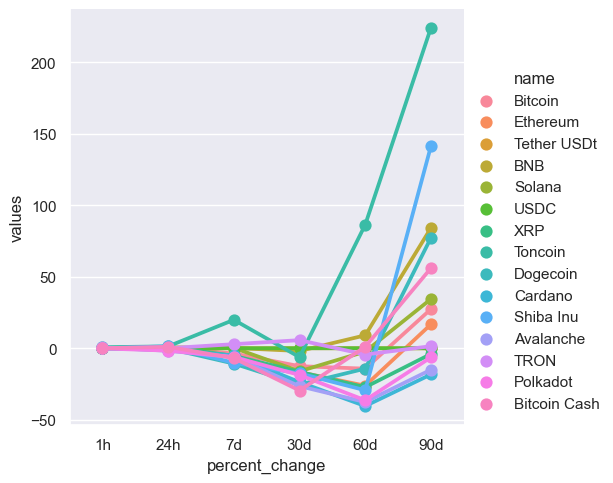

In [89]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [90]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,61175.92809,2024-05-11 18:15:22.165378
15,Bitcoin,61175.92809,2024-05-11 18:15:23.179698
30,Bitcoin,61219.63740,2024-05-11 18:16:23.823550
45,Bitcoin,61219.63740,2024-05-11 18:17:24.448382
60,Bitcoin,61218.96118,2024-05-11 18:18:25.296419
75,Bitcoin,61198.68440,2024-05-11 18:19:25.925436


E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

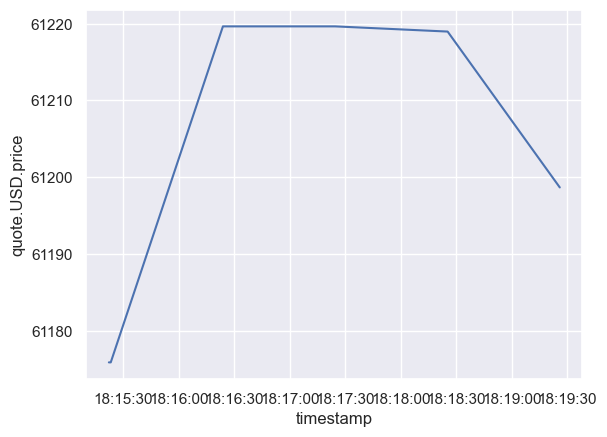

In [91]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)